# Image captioning model - Load pretrained

In [1]:
from transformers import AutoProcessor
from transformers import AutoModelForCausalLM

import torch

from PIL import Image

In [2]:
# Load the processor class associated with the model we are about to fine-tune
checkpoint_processor = 'microsoft/git-large-r-coco'
processor = AutoProcessor.from_pretrained(checkpoint_processor)

In [3]:
# Load the pre-trained model
checkpoint = 'childrensimages-caption-20230909'
model = AutoModelForCausalLM.from_pretrained(checkpoint)

# Inference

In [4]:
# Function to prepare image for the model and caption it
def caption_image(img_path, return_image=False):
    # Prepare image for the model
    image = Image.open(img_path)
    
    # Call generate and decode the predictions
    device = "cuda" if torch.cuda.is_available() else "cpu"

    inputs = processor(images=image, return_tensors="pt").to(device)
    pixel_values = inputs.pixel_values
    
    generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
    generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    # Return image only if specified
    if return_image:
        return image, generated_caption
    else:
        return generated_caption

In [5]:
# Define a list of images
imgs_validation = ['0545077974.jpg','0545533643.jpg','0545834910.jpg','0670887102.jpg','1570619549.jpg']
imgs_captions = {}

In [6]:
# Caption test images
for img in imgs_validation:
    image, generated_caption = caption_image(img,True)
    imgs_captions[img] = {'image':image, 'caption':generated_caption}

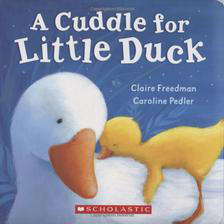

Generated caption:  children's drawing of a yellow dog with the title " a little duck "




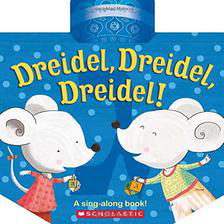

Generated caption:  children's drawing of two dogs wearing clothes around the title " charlie the dog "




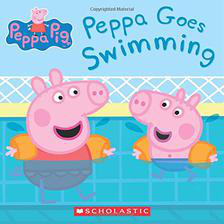

Generated caption:  children's drawing of two pigs with the caption " charlie the piggy "




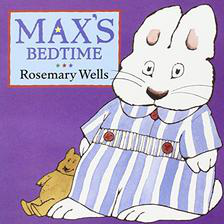

Generated caption:  children's drawing of a dog wearing a white shirt and the caption " charlie's bedtime "




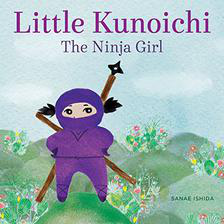

Generated caption:  children's drawing of a knight and a girl with a sword and the title " little knight "




In [7]:
for item in imgs_captions:
    display(imgs_captions[item]['image'])
    print('\033[1mGenerated caption: \033[0m',imgs_captions[item]['caption'])
    print('\n')

## Format caption 
To serve as an input for ChatGPT API.

In [8]:
def clean_sentence(sentence):
    return sentence.replace('children\'s drawing of ','').replace('\'','\\\'')

In [9]:
for item in imgs_captions:
    caption = imgs_captions[item]['caption']
    print(clean_sentence(caption))

a yellow dog with the title " a little duck "
two dogs wearing clothes around the title " charlie the dog "
two pigs with the caption " charlie the piggy "
a dog wearing a white shirt and the caption " charlie\'s bedtime "
a knight and a girl with a sword and the title " little knight "
